In [16]:
V = {'L1' : 0.0, 'L2' : 0.0 }

cnt = 0
while True:
    t = 0.5 * (-1 + 0.9*V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t

    t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
60


In [17]:
#Implements 3*4 grid environment
import numpy as np 
import gridworld_render as render_helper
class GridWorld:
    def __init__(self):
        self.action_space = [0,1,2,3]
        self.action_meaning = {
            0 : 'UP',
            1 : 'DOWN',
            2 : 'LEFT',
            3 : 'RIGHT'
        }
        
        self.reward_map = np.array([
            [0,0,0,1.0],
            [0,None,0,-1.0],
            [0,0,0,0]
        ])

        self.goal_state = (0,3)
        self.wall_state = (1,1)
        self.start_state = (2,0)
        self.agent_state = self.start_state
    
    @property
    def height(self):
        return len(self.reward_map)
    
    @property
    def width(self):
        return len(self.reward_map[0])
    
    @property
    def shape(self):
        return self.reward_map.shape

    def actions(self):
        return self.action_space
    
    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield(h, w)

    def next_state(self, state, action):
        action_move_map = [(-1,0), (1,0), (0,-1), (0,1)]
        move = action_move_map[action]
        next_state = (state[0] + move[0], state[1] + move[1])

        ny, nx = next_state

        if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
            next_state = state

        elif next_state == self.wall_state:
            next_state = state
        
        return next_state
    
    def reward(self, state, action, next_state):
        return self.reward_map[next_state]
    
    def render_v(self, v=None, policy=None, print_value=True):
        renderer = render_helper.Renderer(self.reward_map, self.goal_state,
                                          self.wall_state)
        renderer.render_v(v, policy, print_value)



In [18]:
env = GridWorld()
print(env.height)
print(env.width)
print(env.shape)

for action in env.actions():
    print(action)

for state in env.states():
    print(state)

3
4
(3, 4)
0
1
2
3
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


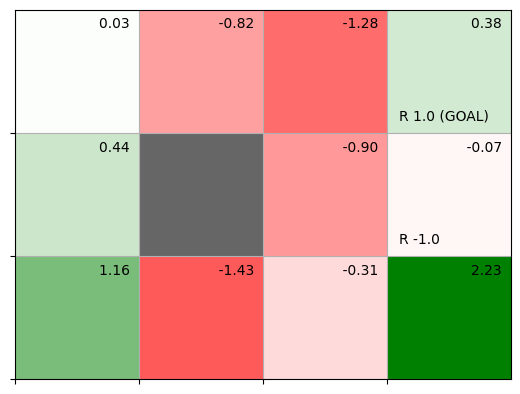

In [19]:
env = GridWorld()
V = {}
for state in env.states():
    V[state] = np.random.randn()
env.render_v(V)

In [20]:
from collections import defaultdict

pi = defaultdict(lambda : {0 : 0.25, 1: 0.25, 2 : 0.25, 3 : 0.25})
state = (0, 1)
print(pi[state])

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


In [21]:
def eval_onestep(pi, V, env, gamma = 0.9):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue
        
        action_probs = pi[state]
        new_V = 0

        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)

            new_V += action_prob * (r+gamma*V[next_state])

        V[state] = new_V
    
    return V

In [22]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        old_V = V.copy()
        V = eval_onestep(pi, V, env, gamma)

        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t
        
        if delta < threshold:
            break
    
    return V

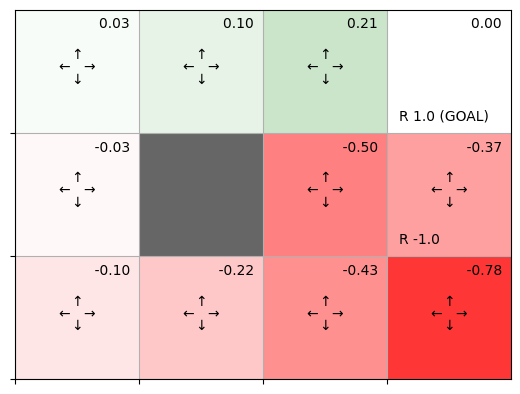

In [23]:
env = GridWorld()
gamma = 0.9
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3:0.25})
V = defaultdict(lambda: 0)

V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)